<a href="https://colab.research.google.com/github/Mahsabeigi33/finantial_market/blob/main/financial_market_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt


# Dataset Generating


In [2]:
data = pdr.get_data_yahoo('ETH-USD', start='2013-01-01', end='2023-05-17')
print(data)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2023-05-12  1795.176636  1812.424927  1742.403809  1808.019775  1808.019775   
2023-05-13  1808.375000  1816.058472  1788.475586  1796.114868  1796.114868   
2023-05-14  1796.107910  1823.490723  1793.228760  1800.500977  1800.500977   
2023-05-15  1800.371216  1845.695435  1787.536377  1817.549927

In [3]:
df=data
df.shape

(2015, 6)

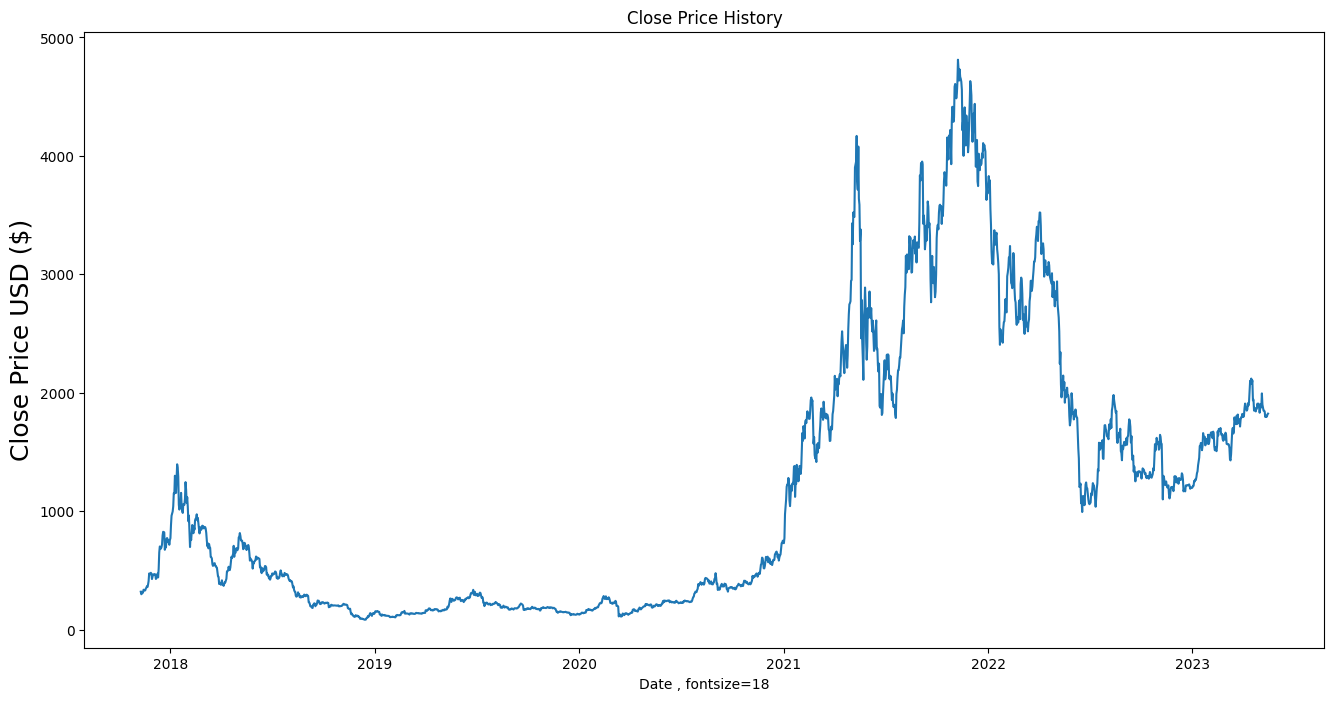

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# creat the 'Close Cloumn'


In [5]:
data=df.filter(['Close'])
print(data)

                  Close
Date                   
2017-11-09   320.884003
2017-11-10   299.252991
2017-11-11   314.681000
2017-11-12   307.907990
2017-11-13   316.716003
...                 ...
2023-05-12  1808.019775
2023-05-13  1796.114868
2023-05-14  1800.500977
2023-05-15  1817.549927
2023-05-16  1824.121460

[2015 rows x 1 columns]


# convert to numpy


In [6]:
dataset=data.values
print(dataset.shape)


(2015, 1)


# the number of rows to be trained


In [7]:
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

1612

# scale the data


In [8]:
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

print(scaled_data.shape)

(2015, 1)


# ready data & create LSTM algorithm

# creat scaled data for training


In [9]:
train_data=scaled_data[0:training_data_len,:]

# split data to x_train , x_test
x_train=[]
y_train=[]

for i in range(100,len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
  


#convert  the x_train , y_train to numpy arrays


In [10]:
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape the data


In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape



(1512, 100, 1)

#Build the LSTM model


In [12]:
model=Sequential()
model.add(LSTM(60, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the Model 


In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')


# Train the Model


In [14]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1512/1512 [==============================] - 56s 36ms/step - loss: 0.0034


## ***validation data 3***

# Creating the testing dataset


In [15]:
test_data=scaled_data[training_data_len-100:,:]
print(len(test_data))
x_test=[] 
y_test=dataset[training_data_len:,:]
for i in range(100,len(test_data)):
  x_test.append(test_data[i-100:i,0])

503


#convert x_test to numpy arrays


In [19]:
x_test=np.array(x_test)

# Reshape x_test


In [20]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Prediction


In [21]:
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)


13/13 [==============================] - 1s 21ms/step


# The root mean squared error


In [22]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

361.5013429248895

#Plot the data


<ipython-input-24-871868100b9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


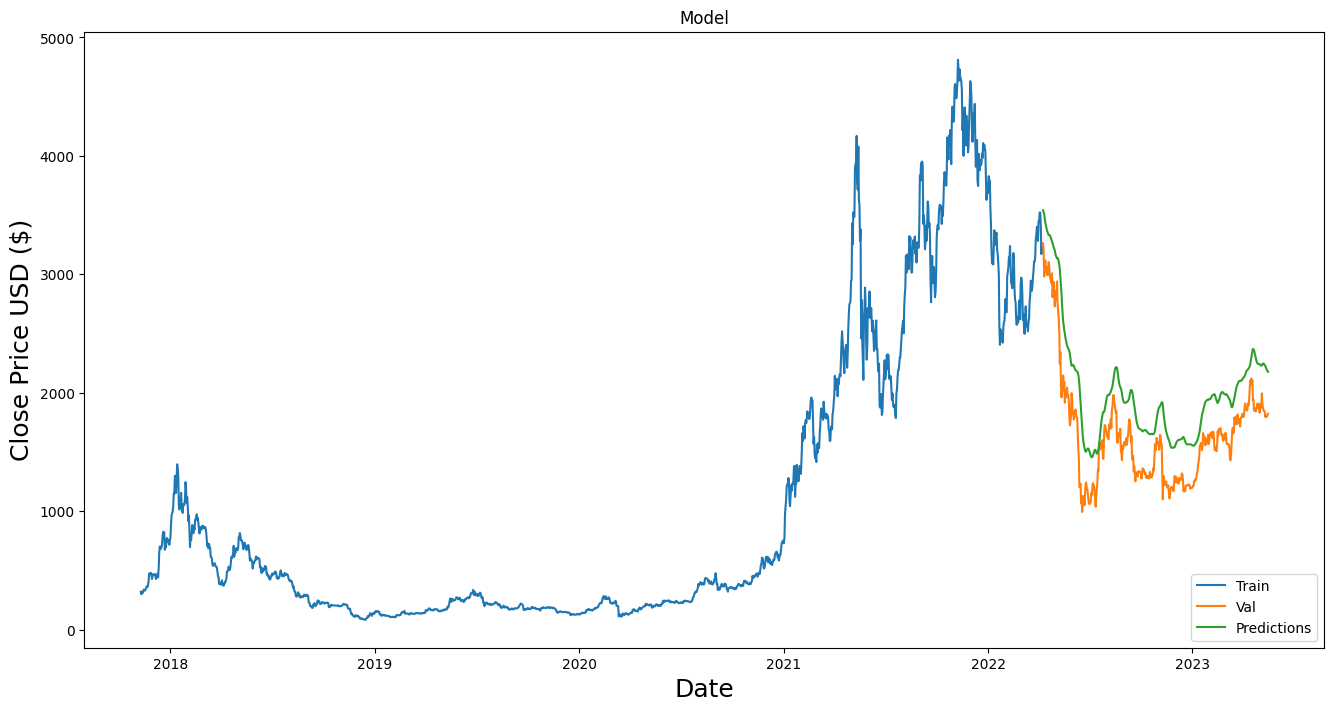

In [24]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()





# Show the valid and predicted prices


In [25]:
valid

,Close,Predictions
Date,,
2022-04-09,3261.916260,3541.057861
2022-04-10,3211.866943,3525.195557
2022-04-11,2981.052246,3509.602539
2022-04-12,3030.376465,3473.414062
2022-04-13,3118.344238,3438.310303
...,...,...
2023-05-12,1808.019775,2214.795410
2023-05-13,1796.114868,2203.494873
2023-05-14,1800.500977,2192.475586


In [26]:
eth = pdr.get_data_yahoo('ETH-USD', start='2013-12-17', end='2023-05-19')

# Create a new data frame
new_df=eth.filter(['Close'])


# Get the last 100 day Closing price values and convert the dataframe to an array

last_100_days=new_df[-100:].values


# Scale the data to be values between 0 and 1

last_100_days_scaled=scalar.transform(last_100_days)
  
# Create an empty list

X_test=[]

X_test.append(last_100_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)



[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 23ms/step
[[2170.4346]]


In [27]:
usd_eth_2= pdr.get_data_yahoo('ETH-USD', start='2013-12-17', end='2023-05-22')
print(usd_eth_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2017-11-09     320.884003
2017-11-10     299.252991
2017-11-11     314.681000
2017-11-12     307.907990
2017-11-13     316.716003
                 ...     
2023-05-17    1821.859619
2023-05-18    1801.728516
2023-05-19    1812.589478
2023-05-20    1820.478027
2023-05-21    1804.531372
Name: Close, Length: 2020, dtype: float64


# Create a function for calculation Moving Average(MA)


In [28]:
def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()


# Create a function for calculation Exponential Moving Average(EMA)



In [29]:
def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()

# Create two new columns for storing the 30 day and 60 day MA


In [30]:
df['MA30']=MA(df,30)
df['MA60']=MA(df,60)

# Create two new columns for storing the 30 day and 60 day MA


In [31]:
df['EMA30']=EMA(df,30)
df['EMA60']=EMA(df,60)

# Get the buy and sell signals


In [32]:
df['Signal']=np.where(df['MA30']>df['MA60'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)

# Get the buy and sell signals


In [34]:
df['Signal']=np.where(df['EMA30']>df['EMA60'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)

#Show the Close price with the MA ,WMA,EMA and Buy and Sell signals


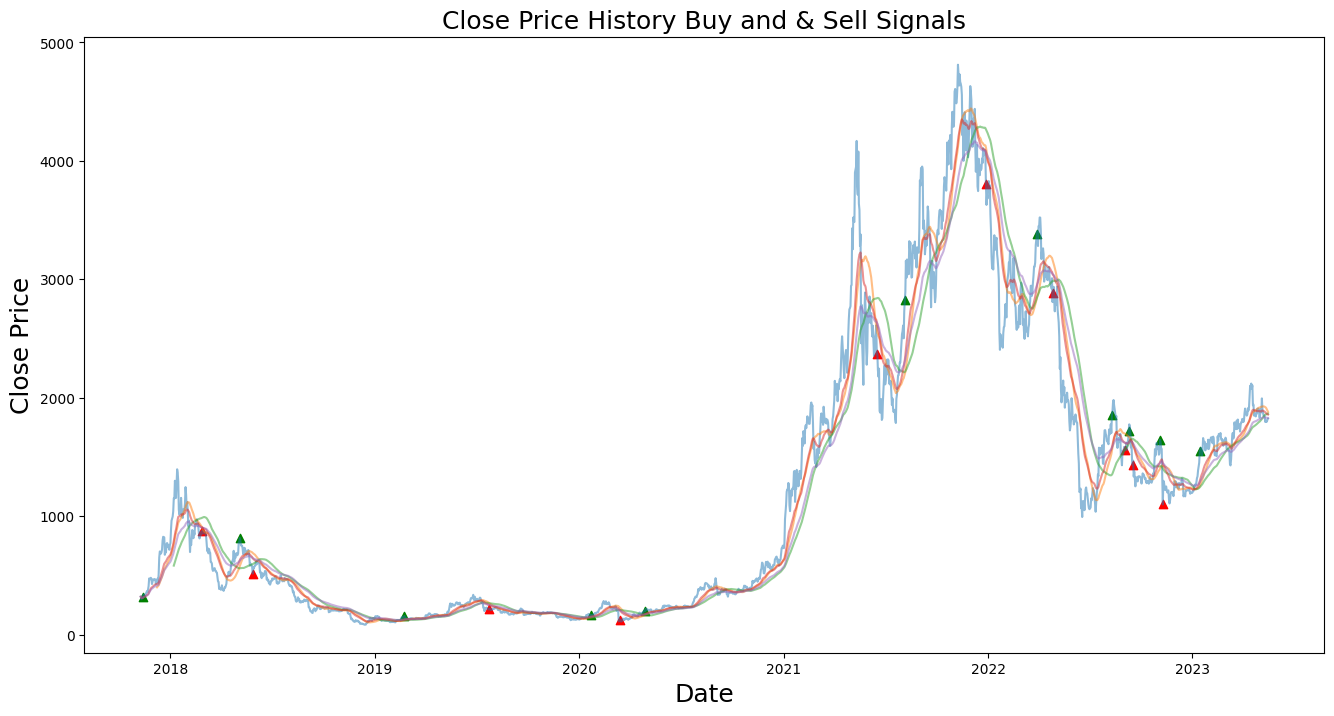

In [35]:
plt.figure(figsize=(16,8))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], alpha=0.5 , label='Close')
plt.plot(df['MA30'], alpha=0.5 , label='MA30')
plt.plot(df['MA60'], alpha=0.5 , label='MA60')
plt.plot(df['EMA30'], alpha=0.5 , label='EMA30')
plt.plot(df['EMA60'], alpha=0.5 , label='EMA60')


plt.scatter(df.index,df['Buy'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()